In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset ('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime (df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x : ast.literal_eval(x)if pd.notna(x) else x)

In [6]:
df_DA_US = df[(df['job_title_short']== 'Data Analyst') & (df['job_country']== 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US ['salary_year_avg'].sample(10)

732367    110000.000
643018     90000.000
719870     52500.000
186485    137500.000
552174     50325.000
459886     55000.000
199701    158175.000
749077    100363.625
310000     62500.000
574041     70000.000
Name: salary_year_avg, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2dacb0580d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2dacb05abd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2dacb0488d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2dacb0595d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2dacb0589d0>],
 'means': []}

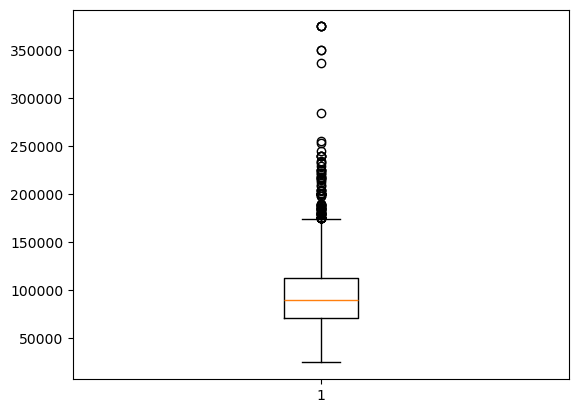

In [13]:
plt.boxplot(df_DA_US['salary_year_avg'])

C:\Users\dasc5\AppData\Local\Temp\ipykernel_14496\1194824383.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


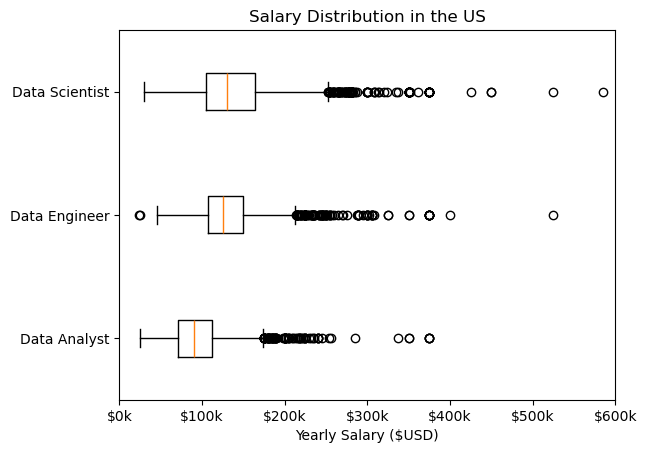

In [19]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US= df[(df['job_title_short']. isin(job_titles)) & (df['job_country']== 'United States')].copy()
df_US = df_US.dropna (subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg']for job_title in job_titles]

plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f'${int(x/1000)}k'))
plt.xlim(0,600000)
plt.show()